In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Data
forestfire=pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\16. Neural Networks\forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
# Check Shape
forestfire.shape

(517, 31)

In [4]:
# Check Null Value
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# Check duplicate values
forestfire[forestfire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# Drop duplicate value
forestfire1= forestfire.drop_duplicates()

In [7]:
forestfire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
#Drop columns
forestfire2=forestfire1.drop(forestfire1.columns[11:30],axis=1)

In [9]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [10]:
#Convert the categoricalvalues of size_category columns to ingeter
forestfire2["month"]=label.fit_transform(forestfire2["month"])
forestfire2["day"]=label.fit_transform(forestfire2["day"])
forestfire2["size_category"]=label.fit_transform(forestfire2["size_category"])

In [11]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


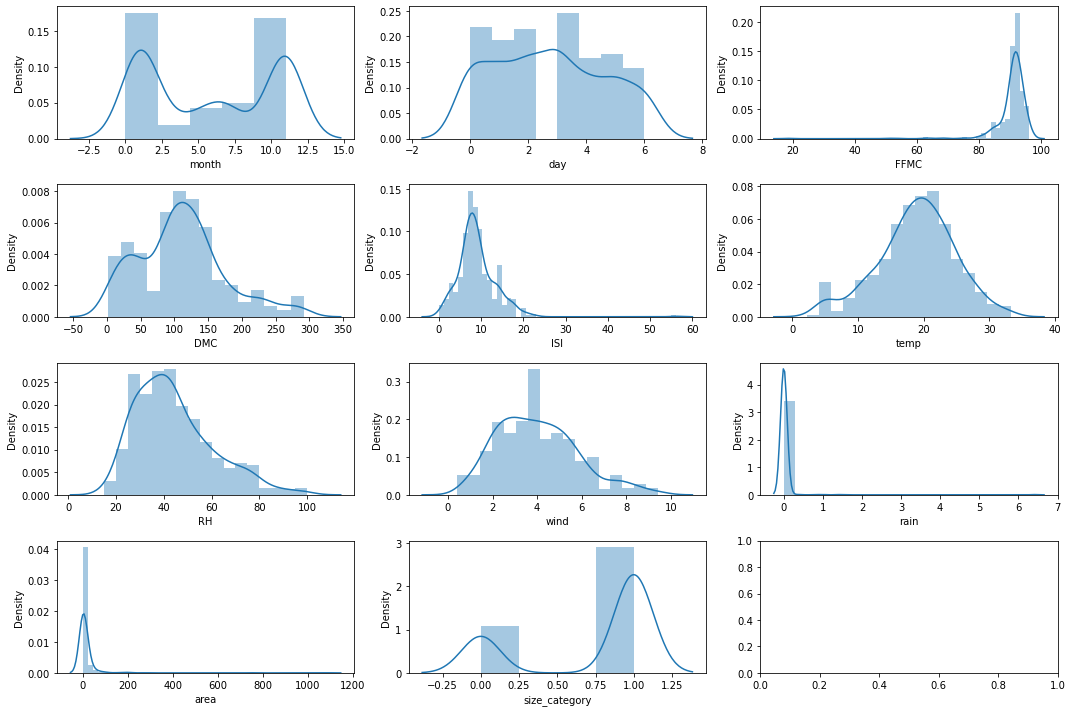

In [12]:
#Cheking the normal distribution of the data using distplot
fig,ax=plt.subplots(4, 3, figsize=(15,10))

sns.distplot(forestfire2.month,ax=ax[0,0])
sns.distplot(forestfire2.day,ax=ax[0,1])
sns.distplot(forestfire2.FFMC,ax=ax[0,2])
sns.distplot(forestfire2.DMC,ax=ax[1,0])
sns.distplot(forestfire2.ISI,ax=ax[1,1])
sns.distplot(forestfire2.temp,ax=ax[1,2])
sns.distplot(forestfire2.RH,ax=ax[2,0])
sns.distplot(forestfire2.wind,ax=ax[2,1])
sns.distplot(forestfire2.rain,ax=ax[2,2])
sns.distplot(forestfire2.area,ax=ax[3,0])
sns.distplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

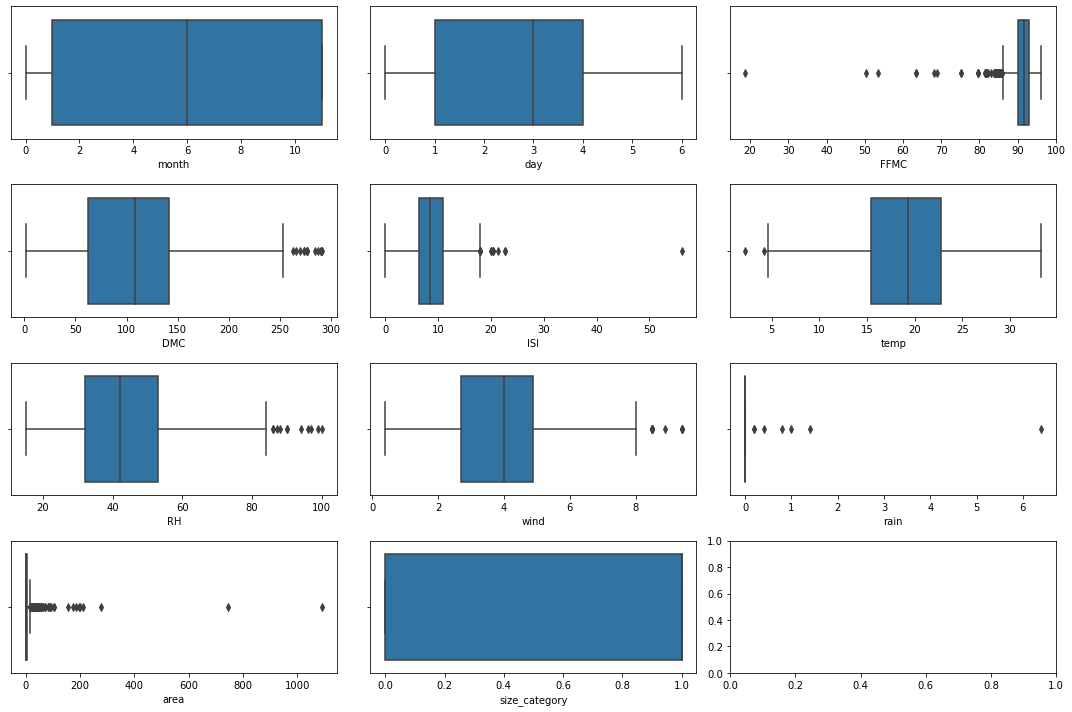

In [13]:
#Check for outliers in the dataset, using boxplot
fig,ax=plt.subplots(4, 3, figsize=(15,10))

sns.boxplot(forestfire2.month,ax=ax[0,0])
sns.boxplot(forestfire2.day,ax=ax[0,1])
sns.boxplot(forestfire2.FFMC,ax=ax[0,2])
sns.boxplot(forestfire2.DMC,ax=ax[1,0])
sns.boxplot(forestfire2.ISI,ax=ax[1,1])
sns.boxplot(forestfire2.temp,ax=ax[1,2])
sns.boxplot(forestfire2.RH,ax=ax[2,0])
sns.boxplot(forestfire2.wind,ax=ax[2,1])
sns.boxplot(forestfire2.rain,ax=ax[2,2])
sns.boxplot(forestfire2.area,ax=ax[3,0])
sns.boxplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

In [14]:
#Extracting the independent and dependent variables
x= forestfire2.iloc[:,:11]
y= forestfire2.iloc[:,-1]

In [15]:
#Build a Sequential neural network with 11 input neurons in the first layer, 8 neurons in the hidden layer and 1 neuron in the output layer.
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

In [16]:
#Compiling the model and using binary cross entropy as the loss function and adam as the weight optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#Fit the model
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 5s 34ms/step - loss: 0.5800 - accuracy: 0.7595 - val_loss: 0.6263 - val_accuracy: 0.6786
Epoch 2/150
35/35 [==============================] - 0s 9ms/step - loss: 0.5521 - accuracy: 0.7595 - val_loss: 0.6052 - val_accuracy: 0.6845
Epoch 3/150
35/35 [==============================] - 0s 9ms/step - loss: 0.5300 - accuracy: 0.7683 - val_loss: 0.5911 - val_accuracy: 0.6964
Epoch 4/150
35/35 [==============================] - 0s 8ms/step - loss: 0.5011 - accuracy: 0.7771 - val_loss: 0.6637 - val_accuracy: 0.6964
Epoch 5/150
35/35 [==============================] - 0s 8ms/step - loss: 0.4785 - accuracy: 0.7830 - val_loss: 0.5424 - val_accuracy: 0.7202
Epoch 6/150
35/35 [==============================] - 0s 9ms/step - loss: 0.4317 - accuracy: 0.8035 - val_loss: 0.5877 - val_accuracy: 0.7321
Epoch 7/150
35/35 [==============================] - 1s 15ms/step - loss: 0.3971 - accuracy: 0.8328 - val_loss: 0.4497 - val_accuracy: 0.7857
Epoch 8/150

35/35 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 0.9912 - val_loss: 0.0838 - val_accuracy: 0.9524
Epoch 59/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0173 - accuracy: 0.9971 - val_loss: 0.1246 - val_accuracy: 0.9405
Epoch 60/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0154 - accuracy: 0.9971 - val_loss: 0.0895 - val_accuracy: 0.9524
Epoch 61/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0172 - accuracy: 0.9971 - val_loss: 0.1956 - val_accuracy: 0.9405
Epoch 62/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0257 - accuracy: 0.9883 - val_loss: 0.0936 - val_accuracy: 0.9405
Epoch 63/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0743 - val_accuracy: 0.9821
Epoch 64/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9883 - val_loss: 0.0881 - val_accuracy: 0.9524
Epoch 65/150

35/35 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9524
Epoch 116/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9583
Epoch 117/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9643
Epoch 118/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9971 - val_loss: 0.1169 - val_accuracy: 0.9524
Epoch 119/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9464
Epoch 120/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9583
Epoch 121/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1254 - val_accuracy: 0.9464
Epoch 122/15

In [18]:
#Evaluate the model
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 6ms/step - loss: 0.0457 - accuracy: 0.9843
accuracy: 98.43%


In [19]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9405
Epoch 2/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9405
Epoch 3/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 0.9583
Epoch 4/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.1299 - val_accuracy: 0.9643
Epoch 5/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9524
Epoch 6/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1756 - val_accuracy: 0.9464
Epoch 7/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2083 - val_accuracy: 0.9405
Epoch 8/150

35/35 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9824 - val_loss: 0.1470 - val_accuracy: 0.9583
Epoch 59/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1596 - val_accuracy: 0.9583
Epoch 60/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9643
Epoch 61/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 0.9643
Epoch 62/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1494 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 0.9643
Epoch 64/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 0.9643
Epoch 65/150
35/35 

35/35 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.4548 - val_accuracy: 0.9107
Epoch 116/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0944 - accuracy: 0.9736 - val_loss: 0.1374 - val_accuracy: 0.9643
Epoch 117/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.9971 - val_loss: 0.2342 - val_accuracy: 0.9345
Epoch 118/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2151 - val_accuracy: 0.9345
Epoch 119/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.9971 - val_loss: 0.2315 - val_accuracy: 0.9345
Epoch 120/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1336 - val_accuracy: 0.9643
Epoch 121/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9643
Epoch 122/15

In [20]:
# List all data in history
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

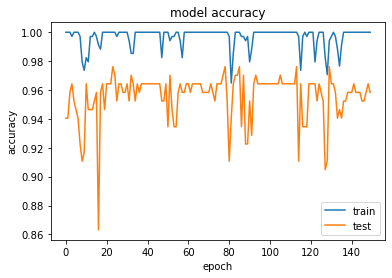

In [21]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

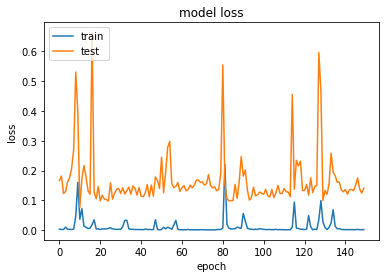

In [22]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The neural network helps classifying the burnt forest areas with a highest evaluation accuracy of 98.43% and with a minimal loss of 0.0457%